## Notebook para el análisis del dataset Flight price

In [1]:
##Librerías iniciales

import pandas as pd; import seaborn as sns; import matplotlib.pyplot as plt; import numpy as np

In [2]:
## Lectura y preprocesamiento

df = pd.read_csv('Clean_Dataset.csv')


##La columna Unnamed: 0 funciona como un índice. Pero, no será necesaría por lo cual vamos a descartarla.

df = df.drop(columns=['Unnamed: 0','flight'])

##Exploración inicial
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [3]:
###Optimización de los datos

types = {'duration':np.float32,
         'days_left':np.int32,
         'price':np.int32
         }

df[list(types.keys())] = df[types.keys()].astype(types)

In [4]:
##verificar la cantidad de valores únicos por columna

for i, col in enumerate(df):
    unicos = df[col].nunique()
    print(f'La columna --> {col} tiene << {unicos} >> valores únicos')


La columna --> airline tiene << 6 >> valores únicos
La columna --> source_city tiene << 6 >> valores únicos
La columna --> departure_time tiene << 6 >> valores únicos
La columna --> stops tiene << 3 >> valores únicos
La columna --> arrival_time tiene << 6 >> valores únicos
La columna --> destination_city tiene << 6 >> valores únicos
La columna --> class tiene << 2 >> valores únicos
La columna --> duration tiene << 476 >> valores únicos
La columna --> days_left tiene << 49 >> valores únicos
La columna --> price tiene << 12157 >> valores únicos


In [5]:
##Estilos
#-------------------------Estilos para los gráficos
import matplotlib as mpl
plt.style.use("fivethirtyeight") 
mpl.rcParams["font.size"]=10.5 
mpl.rcParams["legend.fontsize"]=14
mpl.rcParams["font.family"]="serif"
mpl.rcParams["font.weight"]="bold"
mpl.rcParams["legend.fancybox"]=True
mpl.rcParams["xtick.labelsize"]=10
mpl.rcParams["ytick.labelsize"]=16
mpl.rcParams["figure.titleweight"]="bold"
mpl.rcParams["axes.labelweight"]="bold"
mpl.rcParams["figure.facecolor"]="white"
mpl.rcParams["axes.facecolor"]="white"
mpl.rcParams["axes.edgecolor"]="0.2"
mpl.rcParams["axes.linewidth"]=1
mpl.rcParams["axes.titleweight"]="bold"
mpl.rcParams["axes.labelsize"]=16
mpl.rcParams["figure.titlesize"]=20
mpl.rcParams["axes.titlesize"]=25
mpl.rcParams["figure.labelsize"]=16
mpl.rcParams["figure.labelweight"]="bold"
mpl.rcParams['axes.grid']=False

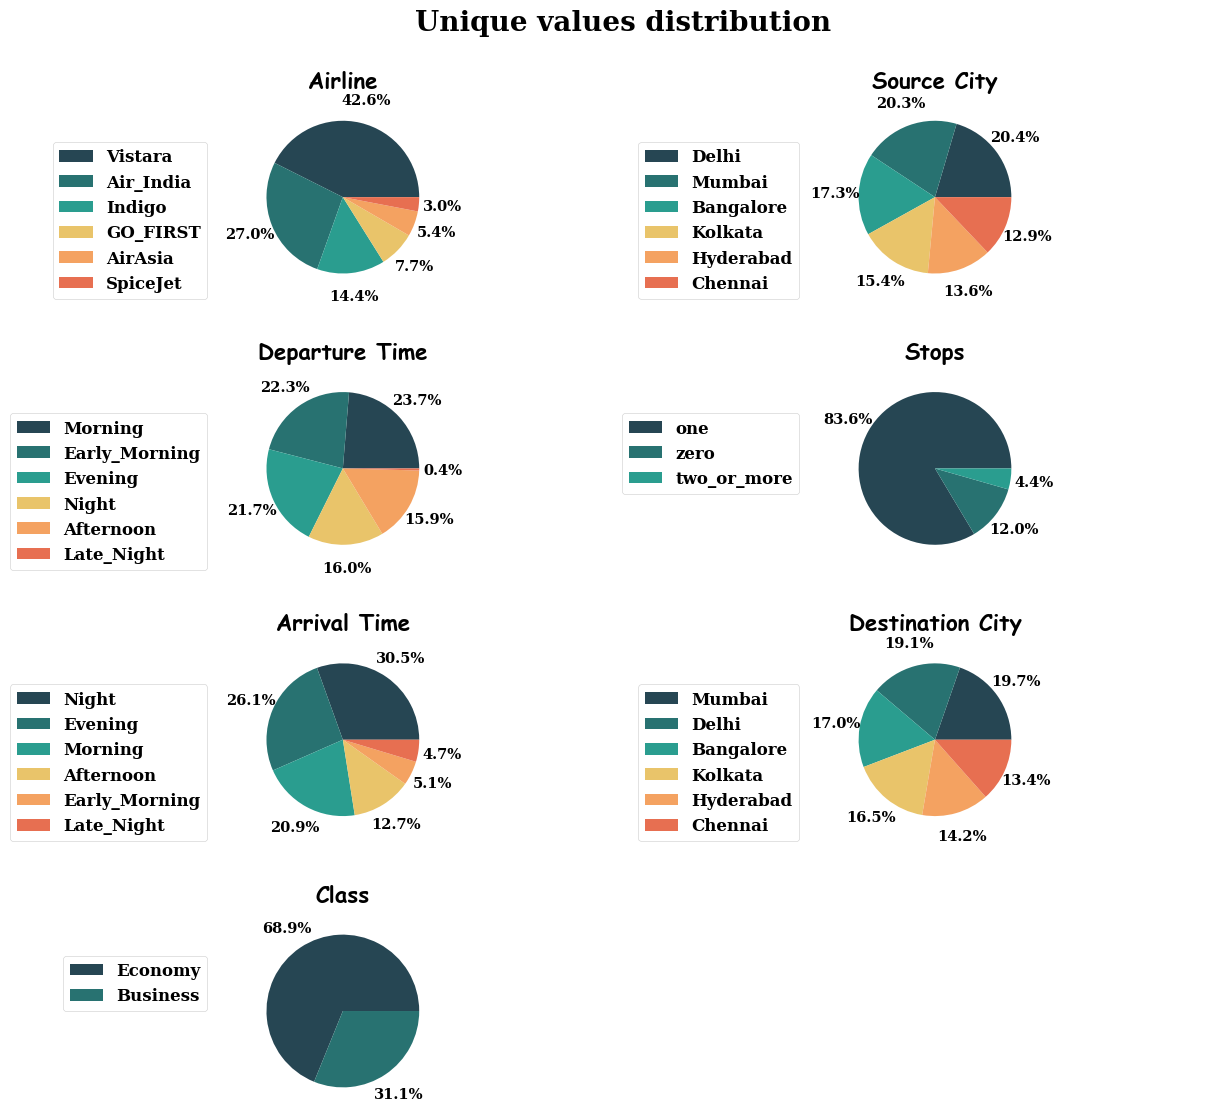

In [7]:
##Visualización de los valores únicos mediante gráfico de pastel

columnas_pie = ['airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class']

df_pie = df.loc[:,columnas_pie]

fig, ax = plt.subplots(nrows=df_pie.shape[1]//2+1,ncols=2,figsize=(12, 10))
fig.tight_layout(h_pad=8)
fig.suptitle('Unique values distribution',y=1.1)
ax = ax.flat
colores = ['#264653','#287271','#2a9d8f','#e9c46a','#f4a261','#e76f51']
for i, col in enumerate(df_pie):
    
    df_pie[col].value_counts().plot(ax=ax[i],kind='pie',autopct='%1.1f%%',radius=1.5,
                                    pctdistance=1.31,labeldistance=None,colors=colores)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col.title().replace('_',' '),fontweight='bold',fontfamily='cursive',fontsize=16,y=1.3)
    ax[i].legend(bbox_to_anchor=(-0.5,1),ncols=1,fontsize=12)
    ax[-1].axis(False)


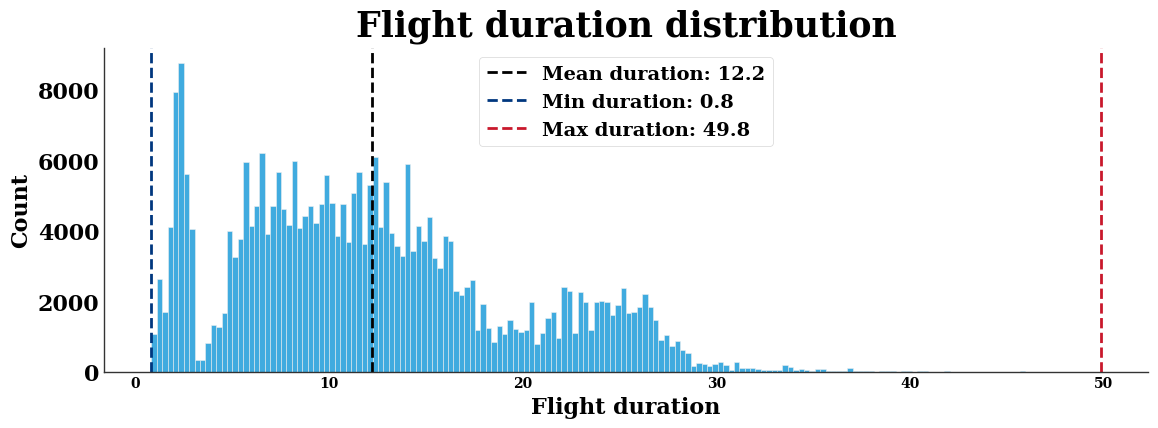

In [7]:
###Distribución de la duración de los vuelos

fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(data=df['duration'])


ax.set_xlabel('Flight duration')
ax.set_title('Flight duration distribution',y=1.01)
ax.spines[['top','right']].set_visible(False)

mean_duration = df['duration'].mean()
min_duration = df['duration'].min()
max_duration = df['duration'].max()

ax.axvline(mean_duration,label=f'Mean duration: {mean_duration:.1f}',color='k',ls='--',lw=2)
ax.axvline(min_duration,label=f'Min duration: {min_duration:.1f}',color='#00377e',ls='--',lw=2)
ax.axvline(max_duration,label=f'Max duration: {max_duration:.1f}',color='#c9182c',ls='--',lw=2)

ax.legend()

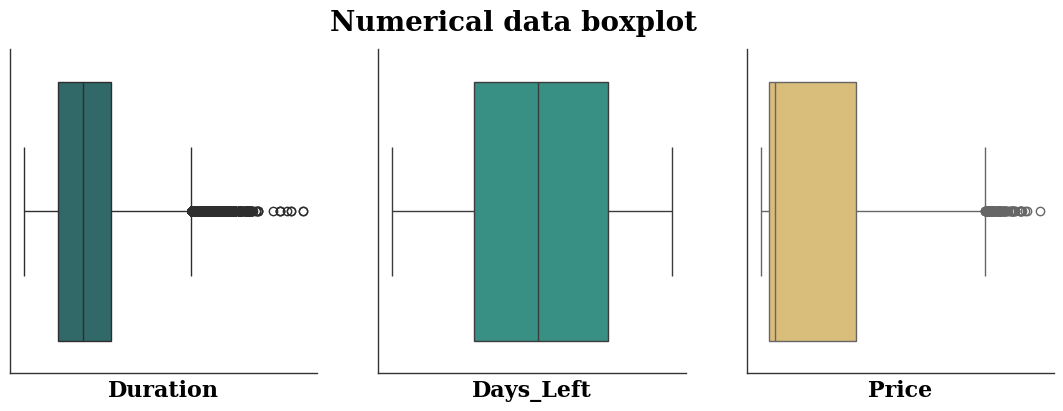

In [8]:
##Verificar valores atípicos

num = df.select_dtypes('number')

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
fig.suptitle('Numerical data boxplot')
ax = ax.flat
for i, col in enumerate(num):


    sns.boxplot(data=df,x=col,ax=ax[i],color=colores[i+1])
    ax[i].set_xlabel(col.title())
    ax[i].spines[['top','right']].set_visible(False)
    ax[i].set_xticks([])


In [9]:
##Conversión de las columnas clase y paradas.

df['class'] = df['class'].map({'Business':1,'Economy':0}).astype(np.int16)
df['stops'] = df['stops'].map({'zero':0, 'one':1, 'two_or_more':2}).astype(np.int16)


## Aplicar codificación a las columnas airline, source_city, departure_time, arrival_time, destination city

columnas_dummie = df.select_dtypes('O').columns

df_dummie = pd.get_dummies(df, columns=columnas_dummie,drop_first=True)

<Axes: >

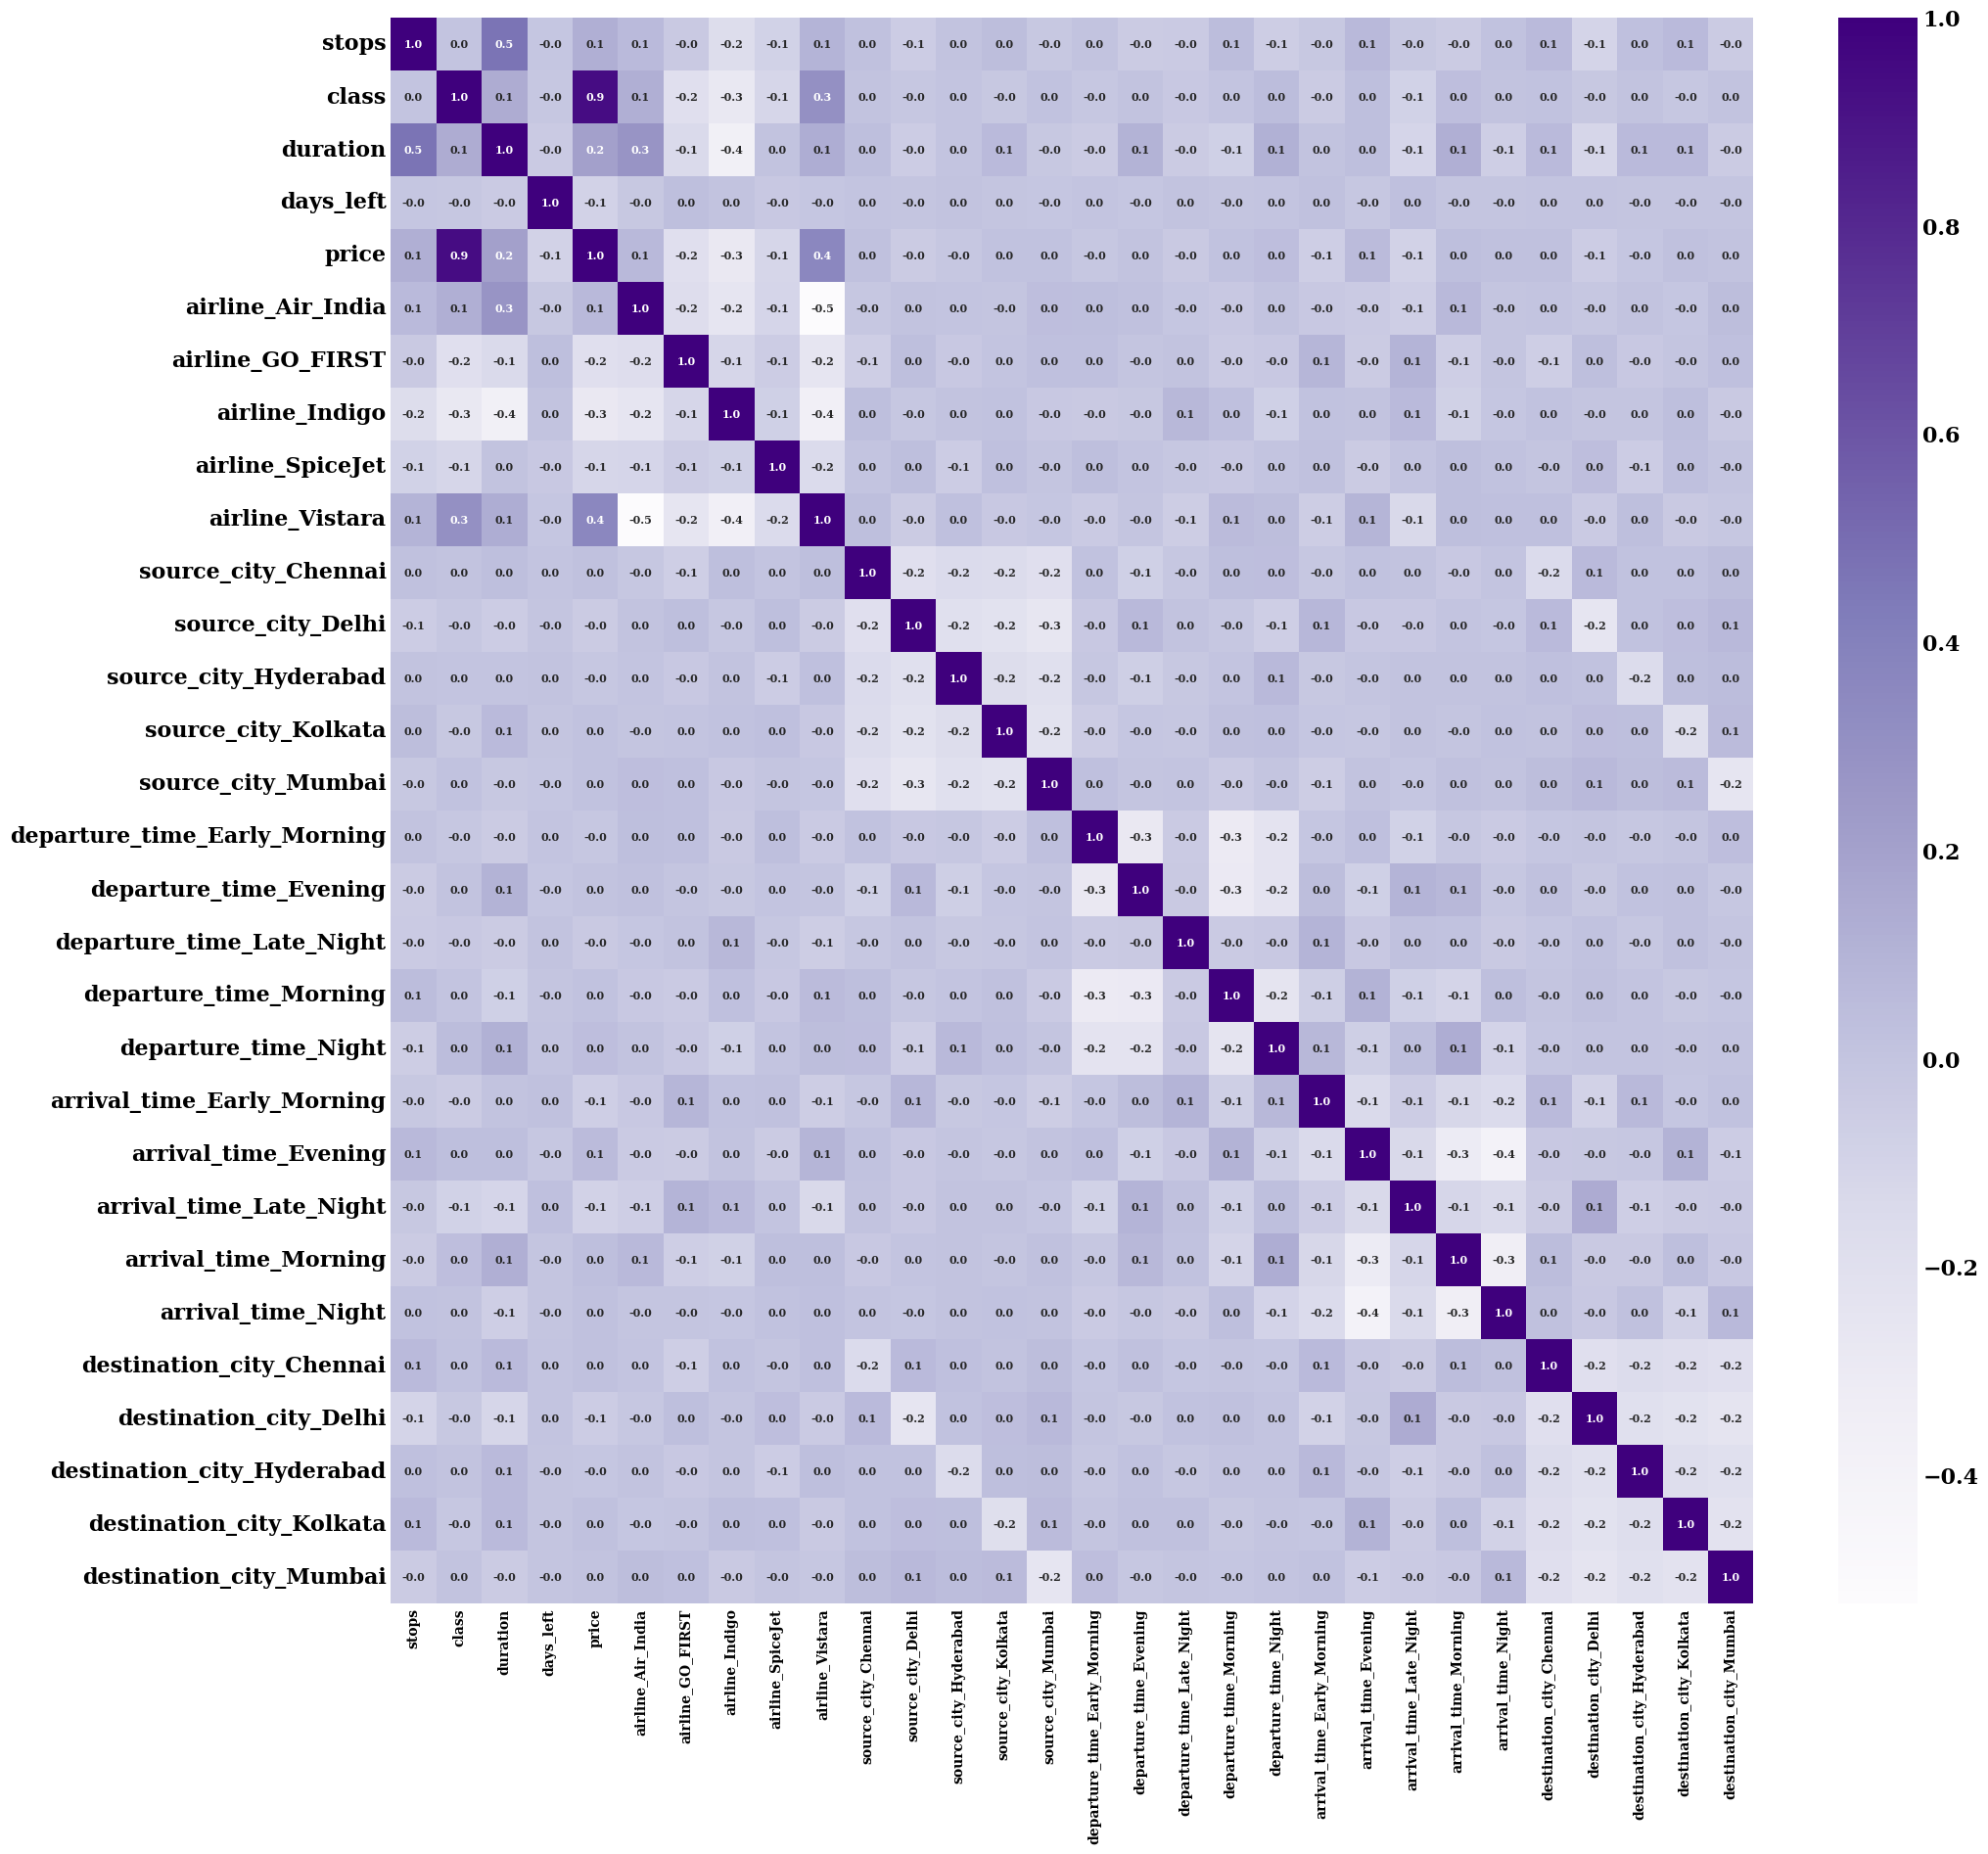

In [10]:
##Correlaciones entre las variables

corr = df_dummie.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True, fmt='.1f',cmap='Purples',annot_kws={'size':8})

### Etapa de modelación

In [32]:
###Vamos a usar varios modelos de Machine Learning para predecir el precio de un vuelo en base a los demás criterios


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from copy import deepcopy
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

x = df_dummie.drop(columns='price')
y = df_dummie['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=456)

In [33]:
def grafico_predicciones(y_train, y_train_pred, y_test, y_test_pred):
    fig, ax = plt.subplots(ncols=2, figsize=(12,4))
    fig.tight_layout(w_pad=4)
    ax[0].scatter(y_train,y_train_pred,color='#cc095d',marker='+')
    ax[0].set_xlabel('Train labels')
    ax[0].set_ylabel('Predicted labels')
    ax[0].set_title('Training set: Actual vs Predicted labels',fontsize=14)
    ax[0].plot(range(int(min(y_train)),int(max(y_train))),color='k')
    ax[0].spines[['top','right']].set_visible(False)  

    ax[1].scatter(y_test,y_test_pred,color='#005f60',marker='o')
    ax[1].set_xlabel('Test labels')
    ax[1].set_ylabel('Predicted labels')
    ax[1].set_title('Test set: Actual vs Predicted labels',fontsize=14)
    ax[1].plot(range(int(min(y_test)),int(max(y_test))),color='k')
    ax[1].spines[['top','right']].set_visible(False)
    
    plt.show()

In [34]:
###Entrenar los modelos

def entrenar_modelos(model):
    model.fit(x_train,y_train)


    ##Puntaje del modelo

    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)

    print(f'Train score: {train_score:.4f}, Test score: {test_score:.4f}')

    ##generar predicciones
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    ##Evaluar el modelo con MSE y R2.
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test,y_test_pred)

    r2_train = r2_score(y_train,y_train_pred)
    r2_test = r2_score(y_test,y_test_pred)

    print(f'MSE train: {mse_train:.4f}, MSE test: {mse_test:.4f}, R2 train: {r2_train:.4f}, R2 test: {r2_test:.4f}')

    ##graficar las predicciones

    grafico_predicciones(y_train,y_train_pred,y_test,y_test_pred)

    return model, test_score


Model Linear Regression
Train score: 0.9101, Test score: 0.9095
MSE train: 46232483.5600, MSE test: 47201213.9642, R2 train: 0.9101, R2 test: 0.9095


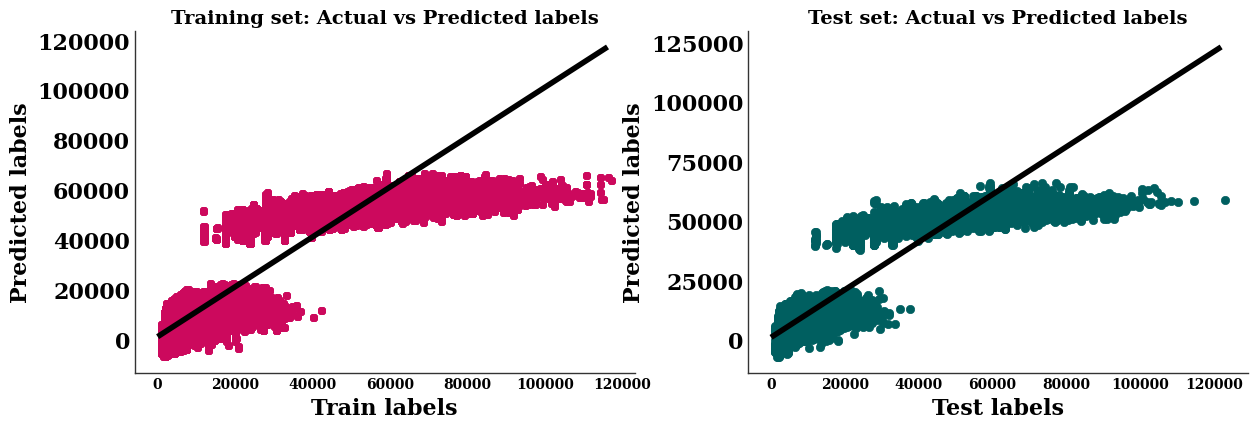

Model Ridge
Train score: 0.9101, Test score: 0.9095
MSE train: 46232483.7977, MSE test: 47201262.2655, R2 train: 0.9101, R2 test: 0.9095


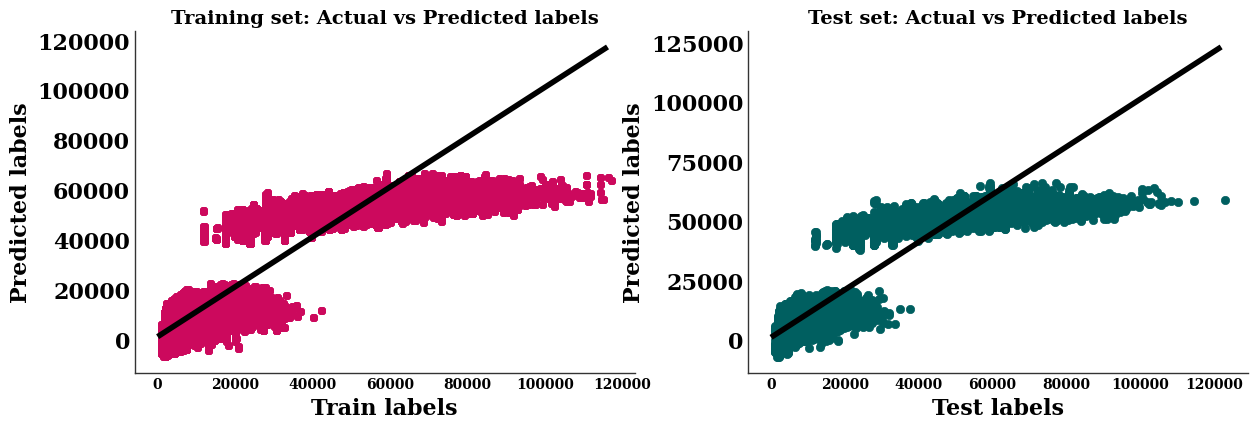

Model Lasso
Train score: 0.9101, Test score: 0.9094
MSE train: 46233814.7814, MSE test: 47204709.3465, R2 train: 0.9101, R2 test: 0.9094


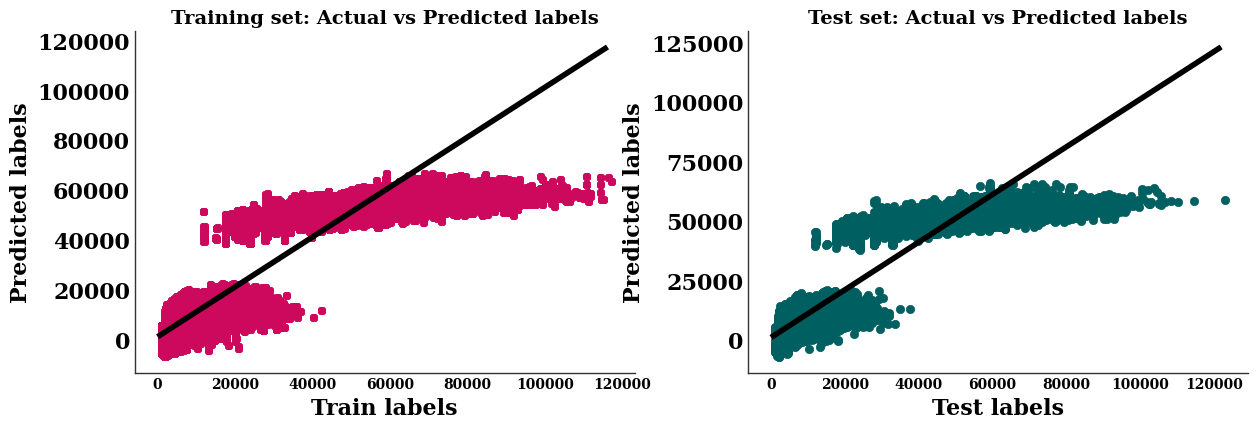

Model ElasticNet
Train score: 0.5094, Test score: 0.5084
MSE train: 252212587.6141, MSE test: 256247485.5497, R2 train: 0.5094, R2 test: 0.5084


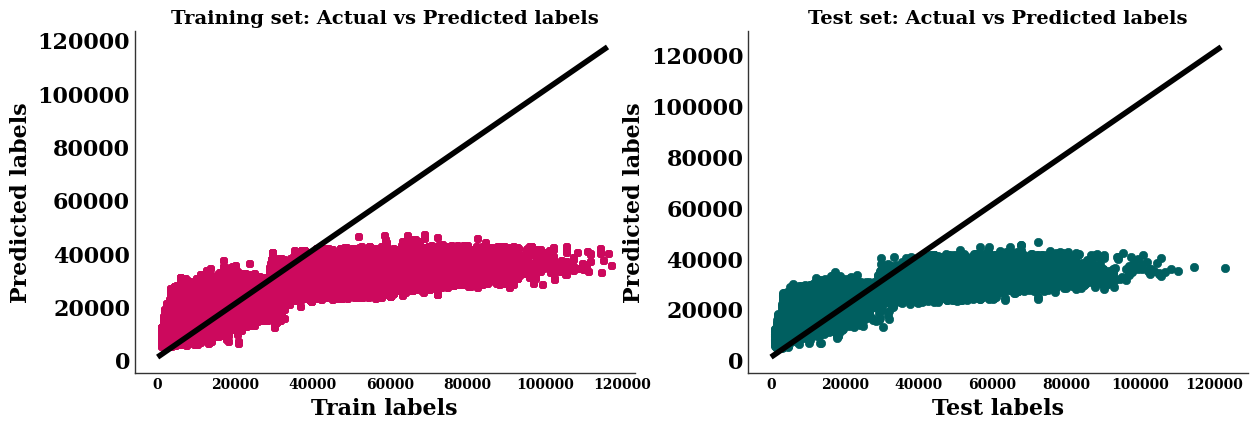

Model Decision Tree
Train score: 0.9993, Test score: 0.9760
MSE train: 362683.1799, MSE test: 12487743.2567, R2 train: 0.9993, R2 test: 0.9760


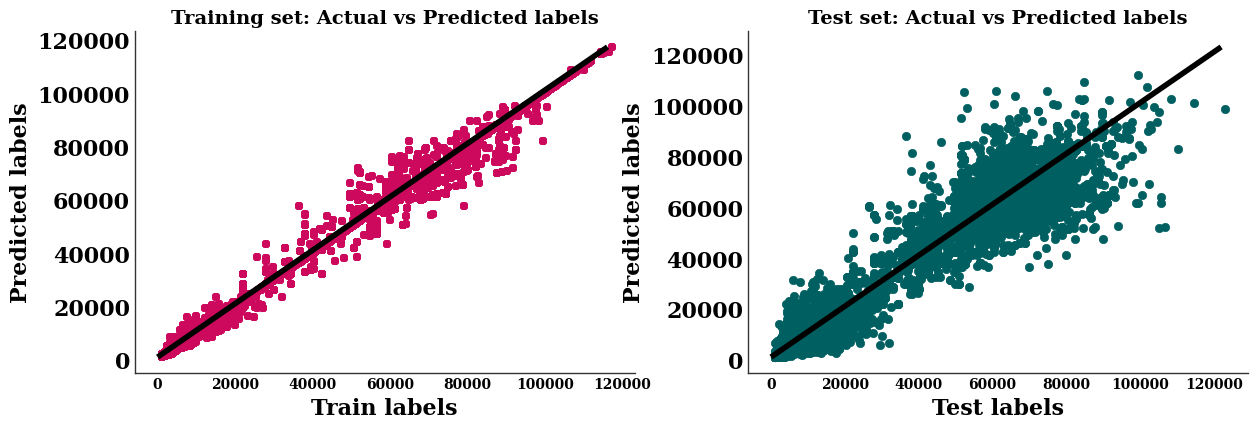

Model Random Forest
Train score: 0.9975, Test score: 0.9851
MSE train: 1284121.9364, MSE test: 7788335.5864, R2 train: 0.9975, R2 test: 0.9851


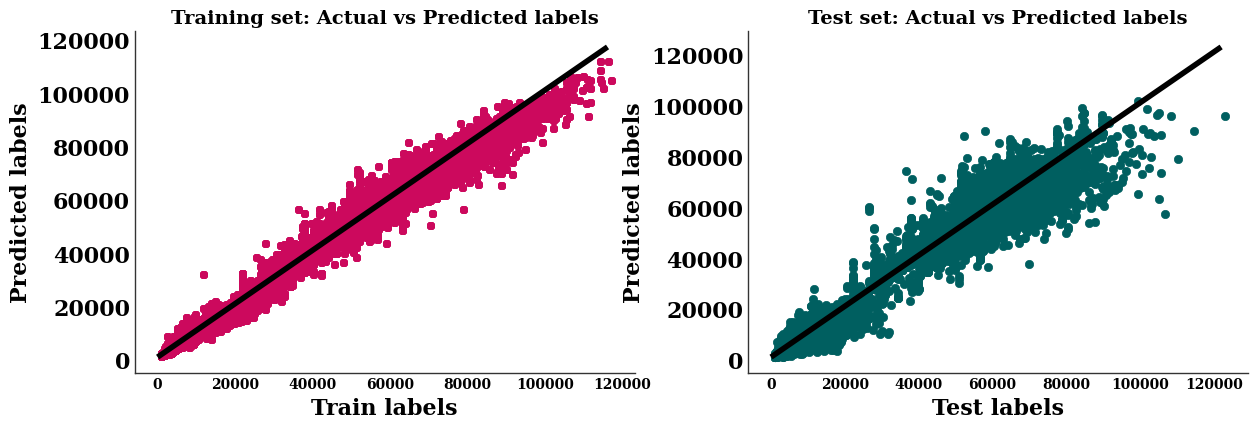

In [36]:
#Modelos usados

models = {
    'Linear Regression':LinearRegression(),
    'Ridge': Ridge(),
    'Lasso':Lasso(),
    'ElasticNet':ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_jobs=-1),
}

best_model = None
best_score = 0

for model_name, model in models.items():
    print(f'Model: {model_name}')
    model, score = entrenar_modelos(model)

    ##Encontrar el mejor modelo

    if score>best_score:
        best_model = model
        best_score = score

In [39]:
###Determinar cuál fue el mejor modelo y su puntaje

print(best_model, best_score)

RandomForestRegressor(n_jobs=-1) 0.985059821341606
